In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss

In [ ]:
playlist_df = pd.read_csv('/PlayList.csv')
playlist_df.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [ ]:
playlist_df['StadiumType'].unique()

array(['Outdoor', 'Indoors', 'Oudoor', 'Outdoors', 'Open', 'Closed Dome',
       'Domed, closed', nan, 'Dome', 'Indoor', 'Domed',
       'Retr. Roof-Closed', 'Outdoor Retr Roof-Open', 'Retractable Roof',
       'Ourdoor', 'Indoor, Roof Closed', 'Retr. Roof - Closed', 'Bowl',
       'Outddors', 'Retr. Roof-Open', 'Dome, closed', 'Indoor, Open Roof',
       'Domed, Open', 'Domed, open', 'Heinz Field', 'Cloudy',
       'Retr. Roof - Open', 'Retr. Roof Closed', 'Outdor', 'Outside'],
      dtype=object)

In [ ]:
playlist_df['StadiumType'] = playlist_df['StadiumType'].str.replace(r'Oudoor|Outdoors|Ourdoor|Outddors|Outdor|Outside|Bowl|Heinz Field|Open|Domed, open|Outdoor Retr Roof-Open|Retr. Roof-Open|Retr. Roof - Open|Outdoor Retr Roof-Outdoor|Retr. Roof-Outdoor|Cloudy', 'Outdoor', regex=True)
playlist_df['StadiumType'] = playlist_df['StadiumType'].str.replace(r'Indoors|Indoor, Roof Closed|Indoor, Open Roof| Closed Dome|Domed, closed|Domed, closed|Domed|Dome|Retr. Roof-Closed|Retr. Roof - Closed|Retr. Roof Closed|Indoor, Outdoor Roof|Closed Indoor|Retractable Roof|Indoor, closed|Indoor, Outdoor', 'Indoor', regex=True)

In [ ]:
playlist_df['StadiumType'].unique()

array(['Outdoor', 'Indoor', 'Closed Indoor', nan, 'Indoor, closed',
       'Indoor, Outdoor'], dtype=object)

In [ ]:
playlist_df['StadiumType'] = playlist_df['StadiumType'].str.replace(r'Closed Indoor|Indoor, closed|Indoor, Outdoor', 'Indoor', regex=True)

In [ ]:
playlist_df['StadiumType'].unique()

array(['Outdoor', 'Indoor', nan], dtype=object)

In [ ]:
playlist_df['StadiumType'].value_counts()

,count
StadiumType,
Outdoor,189480
Indoor,60615


In [ ]:
playlist_df['Weather'].unique()

array(['Clear and warm', 'Mostly Cloudy', 'Sunny', 'Clear', 'Cloudy',
       'Cloudy, fog started developing in 2nd quarter', 'Rain',
       'Partly Cloudy', 'Mostly cloudy', 'Cloudy and cold',
       'Cloudy and Cool', 'Rain Chance 40%', 'Controlled Climate',
       'Sunny and warm', 'Partly cloudy', 'Clear and Cool',
       'Clear and cold', 'Sunny and cold', 'Indoor', nan, 'Partly Sunny',
       'N/A (Indoors)', 'Mostly Sunny', 'Indoors', 'Clear Skies',
       'Partly sunny', 'Showers', 'N/A Indoor', 'Sunny and clear', 'Snow',
       'Scattered Showers', 'Party Cloudy', 'Clear skies',
       'Rain likely, temps in low 40s.', 'Hazy', 'Partly Clouidy',
       'Sunny Skies', 'Overcast', 'Cloudy, 50% change of rain', 'Fair',
       'Light Rain', 'Partly clear', 'Mostly Coudy', '10% Chance of Rain',
       'Cloudy, chance of rain', 'Heat Index 95',
       'Sunny, highs to upper 80s', 'Sun & clouds',
       'Heavy lake effect snow', 'Mostly sunny', 'Cloudy, Rain',
       'Sunny, Windy', '

In [ ]:
cloudy = ['Hazy', 'Cloudy.', 'Overcast', 'Mostly Cloudy',
          'Cloudy, fog started developing in 2nd quarter', 'Partly Cloudy',
          'Mostly cloudy', 'Rain Chance 40%',' Partly cloudy', 'Party Cloudy',
          'Rain likely, temps in low 40s', 'Partly Clouidy', 'Mostly Coudy', '10% Chance of Rain',
          'Cloudy, chance of rain', '30% Chance of Rain', 'cloudy', 'Coudy',
         'Cloudy fog started developing in 2nd quarter',
         'Cloudy 50% change of rain', 'Cloudy and cold',
         'Cloudy and Cool', 'Partly cloudy','Cloudy.']

clear = ['Clear, Windy',' Clear to Cloudy', 'Clear, highs to upper 80s',
             'Clear and clear','Partly sunny', 'Heat Index 95', 'Cold',
             'Clear, Windy', 'Clear skies', 'Sunny', 'Partly Sunny', 'Mostly Sunny', 'Clear Skies',
             'Sunny Skies', 'Partly clear', 'Fair', 'Sunny, highs to upper 80s', 'Sun & clouds', 'Mostly sunny','Sunny, Windy',
             'Mostly Sunny Skies', 'Clear and Sunny', 'Clear and sunny','Clear to Partly Cloudy', 'Clear Skies',
            'Clear and cold', 'Clear and warm', 'Clear and Cool', 'Sunny and cold', 'Sunny and warm', 'Sunny and clear']

rainy = ['Rainy', 'Scattered Showers', 'Showers', 'Cloudy Rain', 'Light Rain', 'Rain shower',
             'Rain likely, temps in low 40s.', 'Cloudy, Rain',
             'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.', 'Cloudy 50% change of rain',
             'Cloudy, 50% change of rain']

snow = ['Heavy lake effect snow', 'Cloudy, light snow accumulating 1-3"']

indoor = ['Controlled Climate', 'Indoors', 'N/A Indoor', 'N/A (Indoors)']

weather_buckets = {
    'Cloudy': cloudy,
    'Clear': clear,
    'Rainy': rainy,
    'Snowy': snow,
    'Indoor': indoor
}

def categorize_weather(weather):
  for bucket, conditions in weather_buckets.items():
      if weather in conditions:
          return bucket

playlist_df['Weather'] = playlist_df['Weather'].apply(categorize_weather)

playlist_df['Weather'].unique()

array(['Clear', 'Cloudy', None, 'Indoor', 'Rainy', 'Snowy'], dtype=object)

In [ ]:
injury_df = pd.read_csv('/InjuryRecord.csv')
injury_df.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [ ]:
playlist_injury_df = injury_df.set_index('GameID').join(playlist_df.set_index('GameID'), how = 'outer',lsuffix='_left', rsuffix='_right')
playlist_injury_df.head()

,PlayerKey_left,PlayKey_left,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,PlayerKey_right,PlayKey_right,...,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
GameID,,,,,,,,,,,,,,,,,,,,,
26624-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26624,26624-1-1,...,1,1,Outdoor,Synthetic,63,Clear,Pass,1,QB,QB
26624-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26624,26624-1-2,...,1,1,Outdoor,Synthetic,63,Clear,Pass,2,QB,QB
26624-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26624,26624-1-3,...,1,1,Outdoor,Synthetic,63,Clear,Rush,3,QB,QB
26624-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26624,26624-1-4,...,1,1,Outdoor,Synthetic,63,Clear,Rush,4,QB,QB
26624-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26624,26624-1-5,...,1,1,Outdoor,Synthetic,63,Clear,Pass,5,QB,QB


In [ ]:
playlist_injury_df['DM_M1'] = playlist_injury_df['DM_M1'].fillna(0).astype(int)
playlist_injury_df['DM_M7'] = playlist_injury_df['DM_M7'].fillna(0).astype(int)
playlist_injury_df['DM_M28'] = playlist_injury_df['DM_M28'].fillna(0).astype(int)
playlist_injury_df['DM_M42'] = playlist_injury_df['DM_M42'].fillna(0).astype(int)
playlist_injury_df['Injury Severity'] = playlist_injury_df['DM_M1'] + playlist_injury_df['DM_M7'] + playlist_injury_df['DM_M28'] + playlist_injury_df['DM_M42']
playlist_injury_df['Injury'] = np.where(playlist_injury_df['Injury Severity'] > 0, 1, 0)
playlist_injury_df.drop(columns=['PlayerKey_left', 'PlayKey_right','PlayKey_left', 'PlayerKey_right', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42', "Surface", "BodyPart"],axis=1,inplace=True)
playlist_injury_df.head()

,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup,Injury Severity,Injury
GameID,,,,,,,,,,,,,
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,1,QB,QB,0,0
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,2,QB,QB,0,0
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Rush,3,QB,QB,0,0
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Rush,4,QB,QB,0,0
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,5,QB,QB,0,0


In [ ]:
playlist_injury_df.drop(columns=["Position", "PositionGroup"],axis=1,inplace=True)
playlist_injury_df.head()

,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Injury Severity,Injury
GameID,,,,,,,,,,,
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,1,0,0
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,2,0,0
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Rush,3,0,0
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Rush,4,0,0
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,5,0,0


In [ ]:
playlist_injury_df["Injury"].value_counts()

,count
Injury,
0,263620
1,3403


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
y = playlist_injury_df['Injury']
X = playlist_injury_df.drop(columns=['Injury', 'Injury Severity'])

In [ ]:
X = pd.get_dummies(X)
X.head()

,PlayerDay,PlayerGame,Temperature,PlayerGamePlay,RosterPosition_Cornerback,RosterPosition_Defensive Lineman,RosterPosition_Kicker,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Quarterback,...,PlayType_Extra Point,PlayType_Field Goal,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Not Returned,PlayType_Punt Returned,PlayType_Rush
GameID,,,,,,,,,,,,,,,,,,,,,
26624-1,1,1,63,1,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
26624-1,1,1,63,2,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
26624-1,1,1,63,3,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
26624-1,1,1,63,4,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
26624-1,1,1,63,5,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [ ]:
## RANDOM FOREST MODEL

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=38)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=38)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

In [ ]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,52584,141
Actual 1,158,522


Accuracy Score : 0.9944012732890178
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52725
           1       0.79      0.77      0.78       680

    accuracy                           0.99     53405
   macro avg       0.89      0.88      0.89     53405
weighted avg       0.99      0.99      0.99     53405



In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importance:\n", feature_importances.sort_values(ascending=False))

Feature Importance:
 PlayerDay                           0.220641
Temperature                         0.177955
PlayerGame                          0.164713
PlayerGamePlay                      0.150926
RosterPosition_Wide Receiver        0.024801
RosterPosition_Safety               0.024336
RosterPosition_Linebacker           0.023319
Weather_Clear                       0.021416
RosterPosition_Cornerback           0.021211
Weather_Cloudy                      0.019796
RosterPosition_Running Back         0.014059
RosterPosition_Offensive Lineman    0.014005
RosterPosition_Defensive Lineman    0.011676
PlayType_Pass                       0.011003
StadiumType_Outdoor                 0.010875
RosterPosition_Tight End            0.009893
PlayType_Rush                       0.009393
Weather_Rainy                       0.009204
Weather_Indoor                      0.007897
StadiumType_Indoor                  0.007798
FieldType_Natural                   0.007457
PlayType_Kickoff                  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance data
feature_importance_data = {
    "Feature": [
        "PlayerDay", "Temperature", "PlayerGame", "PlayerGamePlay", "RosterPosition_Wide Receiver",
        "RosterPosition_Safety", "RosterPosition_Linebacker", "Weather_Clear", "RosterPosition_Cornerback",
        "Weather_Cloudy", "RosterPosition_Running Back", "RosterPosition_Offensive Lineman",
        "RosterPosition_Defensive Lineman", "PlayType_Pass", "StadiumType_Outdoor", "RosterPosition_Tight End",
        "PlayType_Rush", "Weather_Rainy", "Weather_Indoor", "StadiumType_Indoor", "FieldType_Natural",
        "PlayType_Kickoff", "FieldType_Synthetic", "PlayType_Punt", "PlayType_Kickoff Not Returned",
        "PlayType_Extra Point", "PlayType_Field Goal", "PlayType_Punt Returned", "PlayType_Punt Not Returned",
        "PlayType_Kickoff Returned", "RosterPosition_Quarterback", "PlayType_0", "RosterPosition_Kicker",
        "Weather_Snowy"
    ],
    "Importance": [
        0.220641, 0.177955, 0.164713, 0.150926, 0.024801, 0.024336, 0.023319, 0.021416, 0.021211,
        0.019796, 0.014059, 0.014005, 0.011676, 0.011003, 0.010875, 0.009893, 0.009393, 0.009204,
        0.007897, 0.007798, 0.007457, 0.006321, 0.006027, 0.005843, 0.003468, 0.002823, 0.002594,
        0.002532, 0.002391, 0.002333, 0.002087, 0.000787, 0.000331, 0.000092
    ]
}

# Create DataFrame
df = pd.DataFrame(feature_importance_data)

# Sort by importance for better visualization
df = df.sort_values(by="Importance", ascending=False)

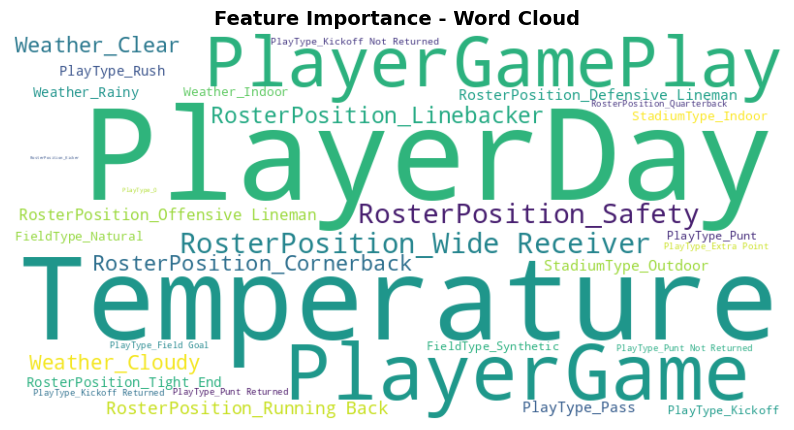

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(df.set_index("Feature")["Importance"])

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Feature Importance - Word Cloud", fontsize=14, fontweight="bold")
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     52725
           1       0.60      0.24      0.34       680

    accuracy                           0.99     53405
   macro avg       0.80      0.62      0.67     53405
weighted avg       0.99      0.99      0.99     53405



In [ ]:
## LOGISTIC REGRESSION MODEL

In [ ]:
def clean_weather(row):
    cloudy = ['Cloudy 50% change of rain', 'Hazy', 'Cloudy.', 'Overcast', 'Mostly Cloudy',
          'Cloudy, fog started developing in 2nd quarter', 'Partly Cloudy',
          'Mostly cloudy', 'Rain Chance 40%',' Partly cloudy', 'Party Cloudy',
          'Rain likely, temps in low 40s', 'Partly Clouidy', 'Cloudy, 50% change of rain','Mostly Coudy', '10% Chance of Rain',
          'Cloudy, chance of rain', '30% Chance of Rain', 'Cloudy, light snow accumulating 1-3"',
          'cloudy', 'Coudy', 'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
         'Cloudy fog started developing in 2nd quarter', 'Cloudy light snow accumulating 1-3"',
         'Cloudywith periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
         'Cloudy 50% change of rain', 'Cloudy and cold',
       'Cloudy and Cool', 'Partly cloudy']

    clear = ['Clear, Windy',' Clear to Cloudy', 'Clear, highs to upper 80s',
             'Clear and clear','Partly sunny',
             'Clear, Windy', 'Clear skies', 'Sunny', 'Partly Sunny', 'Mostly Sunny', 'Clear Skies',
             'Sunny Skies', 'Partly clear', 'Fair', 'Sunny, highs to upper 80s', 'Sun & clouds', 'Mostly sunny','Sunny, Windy',
             'Mostly Sunny Skies', 'Clear and Sunny', 'Clear and sunny','Clear to Partly Cloudy', 'Clear Skies',
            'Clear and cold', 'Clear and warm', 'Clear and Cool', 'Sunny and cold', 'Sunny and warm', 'Sunny and clear']

    rainy = ['Rainy', 'Scattered Showers', 'Showers', 'Cloudy Rain', 'Light Rain', 'Rain shower', 'Rain likely, temps in low 40s.', 'Cloudy, Rain']

    snow = ['Heavy lake effect snow']

    indoor = ['Controlled Climate', 'Indoors', 'N/A Indoor', 'N/A (Indoors)']

    if row.Weather in cloudy:
        return 'Cloudy'

    if row.Weather in indoor:
        return 'Indoor'

    if row.Weather in clear:
        return 'Clear'

    if row.Weather in rainy:
        return 'Rain'

    if row.Weather in snow:
        return 'Snow'

    if row.Weather in ['Cloudy.', 'Heat Index 95', 'Cold']:
        return np.nan

    return row.Weather

def clean_stadiumtype(row):
    if row.StadiumType in ['Bowl', 'Heinz Field', 'Cloudy']:
        return np.nan
    else:
        return row.StadiumType
def clean_play_df(play_df):
    play_df_cleaned = play_df.copy()

    # clean StadiumType
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(r'Oudoor|Outdoors|Ourdoor|Outddors|Outdor|Outside', 'Outdoor')
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(r'Indoors|Indoor, Roof Closed|Indoor, Open Roof', 'Indoor')
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(r'Closed Dome|Domed, closed|Domed, Open|Domed, open|Dome, closed|Domed', 'Dome')
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(r'Retr. Roof-Closed|Outdoor Retr Roof-Open|Retr. Roof - Closed|Retr. Roof-Open|Retr. Roof - Open|Retr. Roof Closed', 'Retractable Roof')
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace('Open', 'Outdoor')
    play_df_cleaned['StadiumType'] = play_df_cleaned.apply(lambda row: clean_stadiumtype(row), axis=1)

    # clean Weather
    play_df_cleaned['Weather'] = play_df_cleaned.apply(lambda row: clean_weather(row), axis=1)

    return play_df_cleaned
play_df_cleaned = clean_play_df(playlist_df)
df1 =  play_df_cleaned.drop_duplicates('GameID')
game_injury_df = injury_df.set_index('GameID').join(df1.set_index('GameID'), how = 'outer',lsuffix='_left', rsuffix='_right')
copy_game_injury = game_injury_df.copy()
game_injury_df['DM_M1'] = game_injury_df['DM_M1'].fillna(0).astype(int)
game_injury_df['DM_M7'] = game_injury_df['DM_M7'].fillna(0).astype(int)
game_injury_df['DM_M28'] = game_injury_df['DM_M28'].fillna(0).astype(int)
game_injury_df['DM_M42'] = game_injury_df['DM_M42'].fillna(0).astype(int)
game_injury_df['Injury'] = game_injury_df['DM_M1'] + game_injury_df['DM_M7'] + game_injury_df['DM_M28'] + game_injury_df['DM_M42']
lis= []
for i in range(len(game_injury_df['Injury'])):
  if(game_injury_df['Injury'][i]>0):
    lis.append(1)
  else:
    lis.append(0)
game_injury_df['Injury']=lis

game_injury_df.drop(columns=['PlayerKey_left','BodyPart', 'PlayKey_right','PlayKey_left', 'PlayerKey_right', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42','Surface','PlayerGamePlay'],axis=1,inplace=True)
condition=game_injury_df['Injury']==0
condition1 = game_injury_df['Injury']==1
game_injury_df1= game_injury_df[condition][:int(len(game_injury_df)*1)]
game_injury_df2 = game_injury_df[condition1]
frames=[game_injury_df1,game_injury_df2]
features_df=pd.concat(frames)

features_df = pd.get_dummies(features_df, dummy_na = False)
features_df

<ipython-input-36-1de9d951d9c9>:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(game_injury_df['Injury'][i]>0):


,PlayerDay,PlayerGame,Temperature,Injury,RosterPosition_Cornerback,RosterPosition_Defensive Lineman,RosterPosition_Kicker,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Quarterback,...,Position_WR,PositionGroup_DB,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_QB,PositionGroup_RB,PositionGroup_SPEC,PositionGroup_TE,PositionGroup_WR
GameID,,,,,,,,,,,,,,,,,,,,,
26624-1,1,1,63,0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
26624-10,74,10,66,0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
26624-11,81,11,47,0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
26624-12,88,12,48,0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
26624-13,96,13,55,0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47307-10,74,10,68,1,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
47307-10,74,10,68,1,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
47334-8,58,8,74,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
y = playlist_injury_df['Injury']
X = playlist_injury_df.drop(columns=['Injury'])

In [ ]:
X = pd.get_dummies(X)
X.head()

,PlayerDay,PlayerGame,Temperature,PlayerGamePlay,Injury Severity,RosterPosition_Cornerback,RosterPosition_Defensive Lineman,RosterPosition_Kicker,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,...,PlayType_Extra Point,PlayType_Field Goal,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Not Returned,PlayType_Punt Returned,PlayType_Rush
GameID,,,,,,,,,,,,,,,,,,,,,
26624-1,1,1,63,1,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
26624-1,1,1,63,2,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
26624-1,1,1,63,3,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
26624-1,1,1,63,4,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
26624-1,1,1,63,5,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
from imblearn.over_sampling import RandomOverSampler
res = RandomOverSampler(random_state=0,sampling_strategy=0.5)
X_resampled, y_resampled = res.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=21,shuffle=True)

In [ ]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52733
           1       1.00      1.00      1.00     26353

    accuracy                           1.00     79086
   macro avg       1.00      1.00      1.00     79086
weighted avg       1.00      1.00      1.00     79086



In [ ]:
res = RandomOverSampler(random_state=0)
problem3_df = injury_df.set_index('GameID').join(df1.set_index('GameID'), how = 'inner',lsuffix='_left', rsuffix='_right')
y = np.array(problem3_df['BodyPart'])
problem3_df.drop(columns=['PlayKey_left','PlayerKey_left','PlayerKey_right','PlayKey_right','PlayerGamePlay','BodyPart'],inplace=True)
problem3_df1 = pd.get_dummies(problem3_df, dummy_na = False)
X = np.array(problem3_df1)
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
res = RandomOverSampler(random_state=0,sampling_strategy={'Knee':480, 'Foot':70, 'Ankle':420, 'Heel':30,'Toes':70})
X_resampled, y_resampled = res.fit_resample(X, y)
print(X_resampled.shape)
print(y_resampled)

{'Ankle': 42, 'Foot': 7, 'Heel': 1, 'Knee': 48, 'Toes': 7}
(1070, 55)
['Knee' 'Knee' 'Ankle' ... 'Toes' 'Toes' 'Toes']


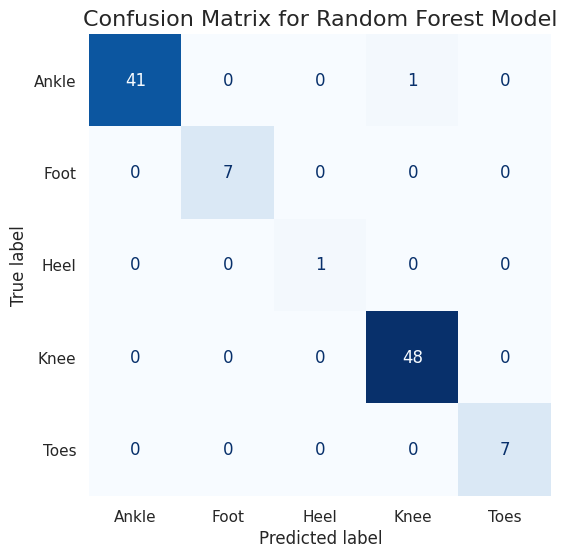

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=21, shuffle=True)

# Print the class distribution in the test set
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

# Initialize and train the Random Forest model
print("Random Forest")
new_rf = RandomForestClassifier(n_estimators=100, random_state=21)  # You can adjust parameters here
new_rf.fit(X_train, y_train)

# Predict on the test data (you can also predict on X, but using the test data is better practice)
y_pred = new_rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate and display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

# Display confusion matrix only once
disp = ConfusionMatrixDisplay.from_estimator(new_rf, X, y, cmap='Blues', colorbar=False, ax=ax)
#disp.plot(cmap='Blues', ax=ax, colorbar=False, linewidths=0)  # Ensure no grid lines

# Customize appearance
plt.title("Confusion Matrix for Random Forest Model", fontsize=16)
ax.set_facecolor('none')  # Transparent background
fig.patch.set_alpha(0)  # Transparent figure background
ax.grid(False)  # Remove any grid lines
ax.set_frame_on(False)

plt.show()


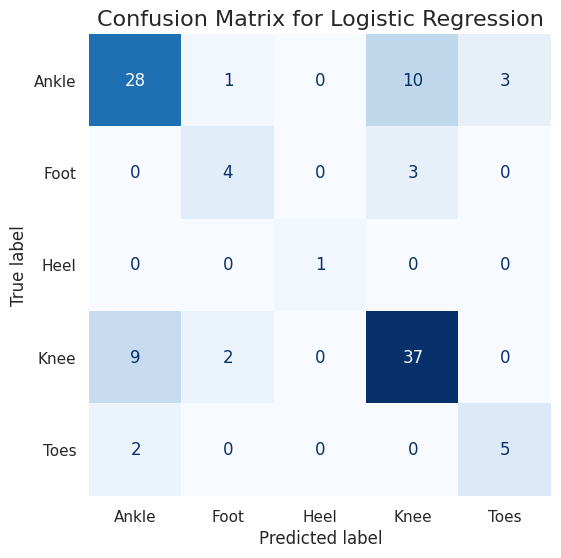

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate and display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_estimator(new1, X, y, cmap='Blues', colorbar=False,ax=ax)

# Set background transparency
ax.set_facecolor('none')  # Make axes background transparent
fig.patch.set_alpha(0)  # Make figure background transparent
plt.title("Confusion Matrix for Logistic Regression", fontsize=16)
ax.set_facecolor('none')  # Transparent axes background
fig.patch.set_alpha(0)  # Transparent figure background
ax.grid(False)  # Remove any grid lines
ax.set_frame_on(False)
plt.show()




Model Comparison:


,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.8900,0.9100,0.8700
1,Random Forest,0.9200,0.9300,0.8900


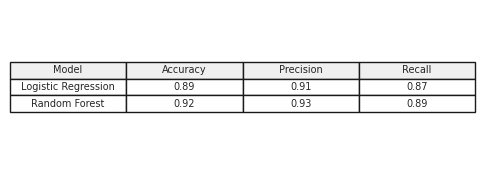

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Sample Data
metrics = ['Accuracy', 'Precision', 'Recall']
log_reg_values = [0.89, 0.91, 0.87]  # Sample Logistic Regression values
rf_values = [0.92, 0.93, 0.89]  # Sample Random Forest values

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': log_reg_values[:1] + rf_values[:1],
    'Precision': log_reg_values[1:2] + rf_values[1:2],
    'Recall': log_reg_values[2:3] + rf_values[2:3]
})

# Style the comparison table
styled_comparison_df = comparison_df.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}'
})

# Highlight the maximum values in each column
styled_comparison_df = styled_comparison_df.apply(lambda x: ['background-color: lightgreen' if v == x.max() else '' for v in x], subset=['Accuracy', 'Precision', 'Recall'])

# Add grid lines to the table
styled_comparison_df = styled_comparison_df.set_table_styles({
    'Model': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
    'Accuracy': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
    'Precision': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
    'Recall': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
}, overwrite=False)

# Display the comparison table
print("\nModel Comparison:")
display(styled_comparison_df)

# Now, render the table as an image using matplotlib
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')

# Render the pandas dataframe as a table within matplotlib
table = ax.table(cellText=comparison_df.values, colLabels=comparison_df.columns, cellLoc='center', loc='center', colColours=['#f0f0f0']*len(comparison_df.columns))

# Apply the same styling as the pandas style, highlighting the best performer
for (i, row) in enumerate(comparison_df.values):
    for (j, val) in enumerate(row):
        if i == 0:
            if j > 0:  # Skip Model column
                if val == max(comparison_df.iloc[:, j].values):
                    table[(i, j)].set_facecolor('lightgreen')

# Set the background of the figure to transparent
fig.patch.set_facecolor('none')  # Make figure background transparent

# Save the figure as an image with transparent background
plt.savefig("model_comparison_table.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest


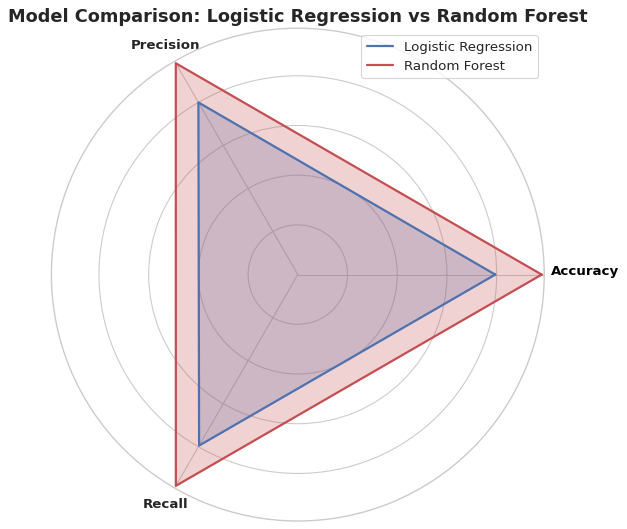

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=21, shuffle=True)

# Train and evaluate Logistic Regression model
print("Logistic Regression")
log_reg = LogisticRegression(max_iter=500, multi_class='ovr')  # Assuming multi-class one-vs-rest strategy
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Get metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')  # Adjusted for multiclass
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')

# Train and evaluate Random Forest model
print("Random Forest")
random_forest = RandomForestClassifier(n_estimators=100, random_state=21)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Get metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # Adjusted for multiclass
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Prepare the data for radar plot
metrics = ['', 'Precision', 'Recall']
log_reg_values = [accuracy_log_reg, precision_log_reg, recall_log_reg]
rf_values = [accuracy_rf, precision_rf, recall_rf]

# Create a 2D array to store the values for the radar chart
values = np.array([log_reg_values, rf_values])

# Set up the angles for the radar chart (one for each metric)
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()

# Close the radar chart (so the last value connects to the first)
values = np.concatenate((values, values[:,[0]]), axis=1)
angles += angles[:1]  # Make sure the chart is closed

# Plot the radar chart
fig, ax = plt.subplots(figsize=(8, 8), dpi=80, subplot_kw=dict(polar=True))

# Plot both models on the same radar chart
ax.plot(angles, values[0], linewidth=2, linestyle='solid', label='Logistic Regression', color='b')
ax.plot(angles, values[1], linewidth=2, linestyle='solid', label='Random Forest', color='r')

# Fill the area inside the radar chart
ax.fill(angles, values[0], color='b', alpha=0.25)
ax.fill(angles, values[1], color='r', alpha=0.25)

# Set the labels for each axis (the metrics)
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12, fontweight='bold')

# Move the Accuracy label a little to the right
ax.text(angles[0] , values[0][0] + 0.5, 'Accuracy', horizontalalignment='right', fontsize=12, fontweight='bold', color='black')

# Add a title and legend
ax.set_title('Model Comparison: Logistic Regression vs Random Forest', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)

# Set the background of the figure to transparent
fig.patch.set_facecolor('none')

# Show the radar chart
plt.show()

